Parkinsons Disease Prediction

Data Collection and Preprocessing

In [97]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [76]:
dataset=pd.read_csv('parkinsons.data')
dataset

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,Outcome,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [78]:
dataset.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
Outcome             0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [79]:
new_dataset=dataset.drop(columns='name',axis=1)
new_dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,Outcome,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Counts of Outcome :  Outcome
1    147
0     48
Name: count, dtype: int64


<Axes: xlabel='Outcome', ylabel='count'>

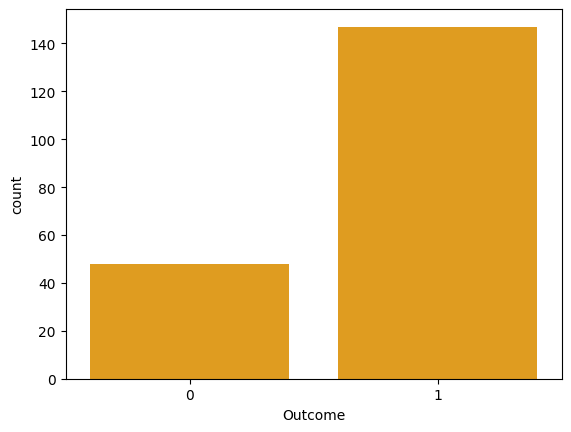

In [80]:
print("Counts of Outcome : ",new_dataset['Outcome'].value_counts())
sns.countplot(data=new_dataset,x='Outcome',color='Orange')

<Axes: >

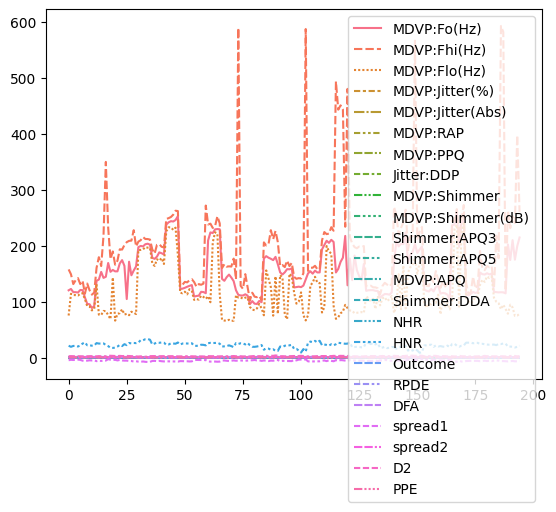

In [81]:
sns.lineplot(new_dataset)

Data Splitting of Training and Testing

In [82]:
X=new_dataset.drop(columns='Outcome',axis=1)
Y=new_dataset[['Outcome']]
print([X])
Y

[     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.0

,Outcome
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


In [83]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=0.80,random_state=0)
print("Shape of training data :",xtrain.shape,ytrain.shape)
print("Shape of testing data : ",xtest.shape,ytest.shape)

Shape of training data : (156, 22) (156, 1)
Shape of testing data :  (39, 22) (39, 1)


Model Selection and Evaluation

In [84]:
model=RandomForestClassifier(criterion='gini',n_estimators=100,max_depth=10,random_state=0,max_features=10)
model.fit(xtrain,ytrain)
print(model)
evaluation=model.predict(xtest)
print("Evaluation of test data : ",evaluation)
accuracy=accuracy_score(ytest,evaluation)*100
print("Accuracy : ",accuracy)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, max_features=10, random_state=0)
Evaluation of test data :  [1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1
 1 1]
Accuracy :  92.3076923076923


[[ 9  2]
 [ 1 27]]


array([ 9,  2,  1, 27], dtype=int64)

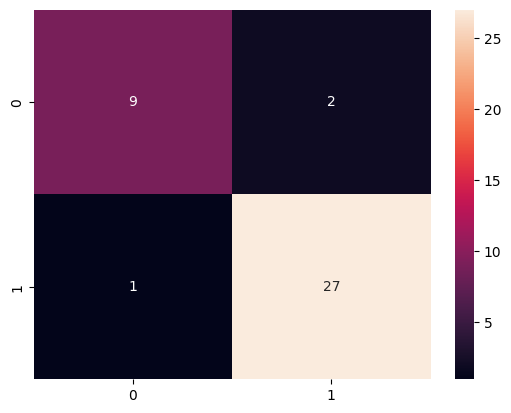

In [85]:
cm=confusion_matrix(evaluation,ytest)
print(cm)
sns.heatmap(cm,annot=True)
cm.ravel()

In [86]:
print("F1 Score : ",f1_score(evaluation,ytest)*100)

F1 Score :  94.73684210526316


In [87]:
report=classification_report(ytest,evaluation)
report

'              precision    recall  f1-score   support\n\n           0       0.82      0.90      0.86        10\n           1       0.96      0.93      0.95        29\n\n    accuracy                           0.92        39\n   macro avg       0.89      0.92      0.90        39\nweighted avg       0.93      0.92      0.92        39\n'

Accuracy Boosting

In [88]:
boosting=GradientBoostingClassifier(criterion='friedman_mse',n_estimators=100)
print(boosting)
boosting.fit(xtrain,ytrain) 
result=boosting.predict(xtest)
print("Result : ",result)
accuracy1=accuracy_score(result,ytest)*100
print("Accuracy : ",accuracy1)

GradientBoostingClassifier()


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Result :  [1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 1]
Accuracy :  94.87179487179486


[[ 9  1]
 [ 1 28]]


array([ 9,  1,  1, 28], dtype=int64)

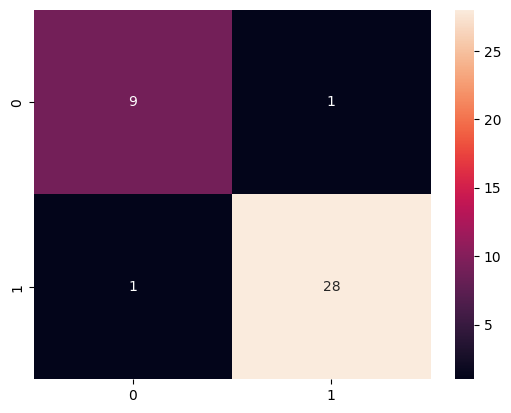

In [89]:
cm=confusion_matrix(result,ytest)
print(cm)
sns.heatmap(cm,annot=True)
cm.ravel()

In [90]:
print("F1 Score : ", f1_score(result,ytest)*100)

F1 Score :  96.55172413793103


In [91]:
print("Accuracy of Random Forest :",accuracy)
print("Accuracy of gradienboosting :",accuracy1)
print("F1 Score : ",f1_score(evaluation,ytest)*100)
print("F1 Score : ", f1_score(result,ytest)*100)

Accuracy of Random Forest : 92.3076923076923
Accuracy of gradienboosting : 94.87179487179486
F1 Score :  94.73684210526316
F1 Score :  96.55172413793103


Prediction of Raw Data

In [92]:
new_data=np.array([[98.80400,102.30500,87.80400,0.00432,0.00004,0.00247,0.00258,0.00742,0.02223,0.20200,0.01277,0.01343,0.01552,0.03831,0.00882,22.24400,0.576644,0.772416,-6.025367,0.078202,2.053601,0.177275]])

In [93]:
raw_data=boosting.predict(new_data)
print(boosting.predict(new_data))
print(model.predict(new_data))

[1]
[1]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [94]:
if(raw_data==0):
    print("The disease is not affected")
else:
    print("The disease is affected")

The disease is affected
